## Looking for missing values

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

circuits = pd.read_csv("f1db_csv/circuits.csv", na_filter=True)
constructors = pd.read_csv("f1db_csv/constructors.csv", na_filter=True)
constructorsResults = pd.read_csv("f1db_csv/constructor_results.csv", na_filter=True)
constructorsStandings = pd.read_csv("f1db_csv/constructor_standings.csv", na_filter=True)
drivers = pd.read_csv("f1db_csv/drivers.csv", na_filter=True)
driverStandings = pd.read_csv("f1db_csv/driver_standings.csv", na_filter=True)
lapTimes = pd.read_csv("f1db_csv/lap_times.csv", na_filter=True)
races = pd.read_csv("f1db_csv/races.csv", na_filter=True)
results = pd.read_csv("f1db_csv/results.csv", na_filter=True)
pitstops = pd.read_csv("f1db_csv/pit_stops.csv", na_filter=True)
seasons = pd.read_csv("f1db_csv/seasons.csv", na_filter=True)

#replace United States by USA to uniform
circuits['country'] = circuits['country'].replace('United States', 'USA')

# replace "\N" with NaN
#circuits.replace(r'^\\N$', pd.NA, regex=True, inplace=True)
#constructors.replace(r'^\\N$', pd.NA, regex=True, inplace=True)
#constructorsResults.replace(r'^\\N$', pd.NA, regex=True, inplace=True)
#constructorsStandings.replace(r'^\\N$', pd.NA, regex=True, inplace=True)
#drivers.replace(r'^\\N$', pd.NA, regex=True, inplace=True)
#driverStandings.replace(r'^\\N$', pd.NA, regex=True, inplace=True)
#lapTimes.replace(r'^\\N$', pd.NA, regex=True, inplace=True)

# looking for missing values
#circuits_missing_values = circuits.isna()
#constructors_missing_values = constructors.isna()
#constructorsResults_missing_values = constructorsResults.isna()
#constructorsStandings_missing_values = constructorsStandings.isna()
#drivers_missing_values = constructors.isna()
#driverStandings_missing_values = constructors.isna()
#lapTimes_missing_values = constructors.isna()

#print(circuits_missing_values.sum())
#print(constructors_missing_values.sum())
#print(constructorsResults_missing_values.sum())
#print(constructorsStandings_missing_values.sum())
#print(drivers_missing_values.sum())
#print(driverStandings_missing_values.sum())
#print(lapTimes_missing_values.sum())



### Races per Year Chart

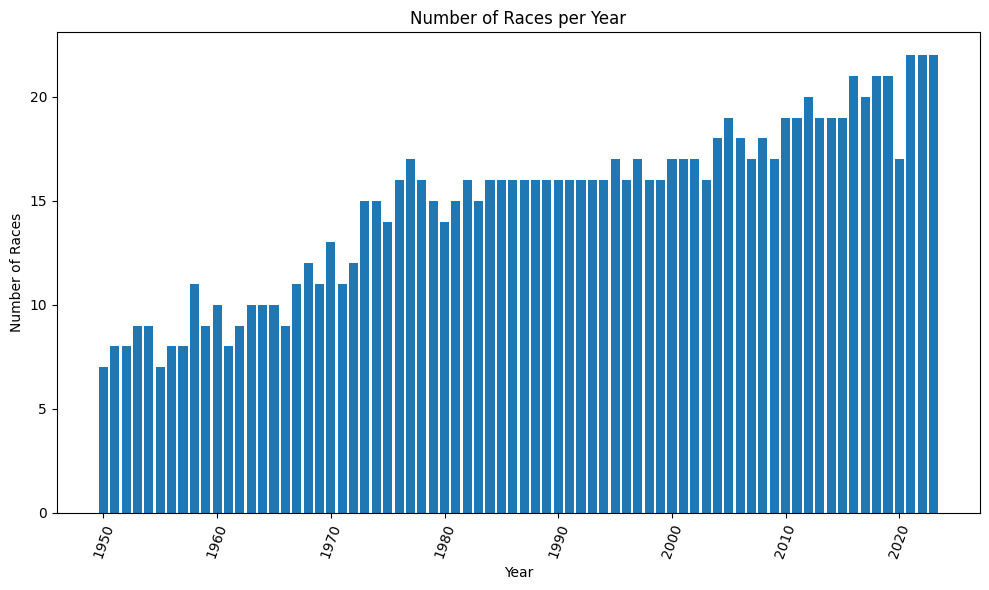

In [95]:
## Races per year
races_per_year = races['year'].value_counts().reset_index()
races_per_year.columns = ['Year', 'NumberOfRaces']

plt.figure(figsize=(10, 6))
plt.bar(races_per_year['Year'], races_per_year['NumberOfRaces'])
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.title('Number of Races per Year')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Circuits per Country Chart

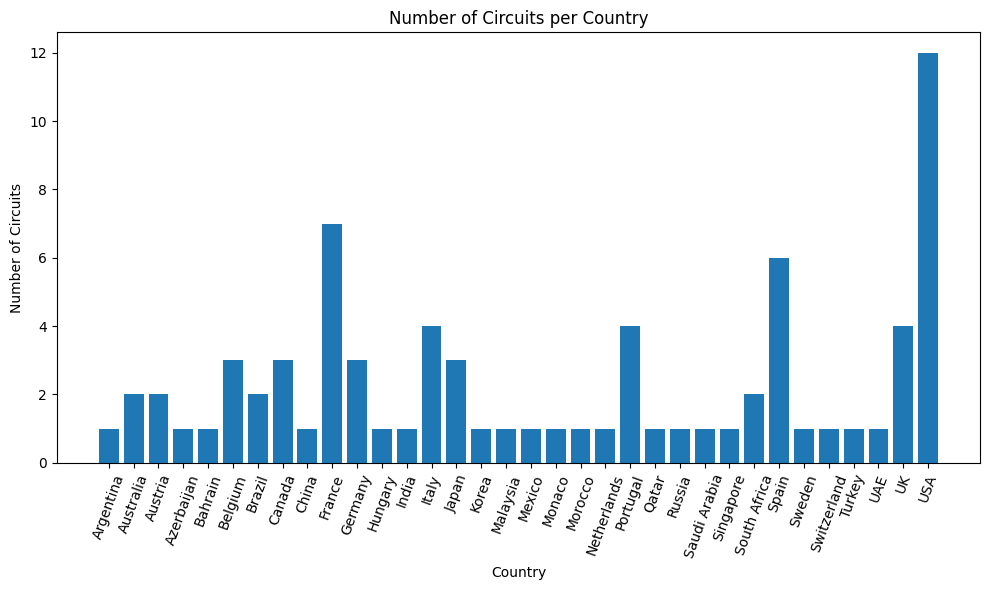

In [96]:
## Circuits per country
circuit_counts = circuits.groupby('country')['circuitRef'].size().reset_index(name='count')
#print(circuit_counts)

plt.figure(figsize=(10, 6))
plt.bar(circuit_counts['country'], circuit_counts['count'])
plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.title('Number of Circuits per Country')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

## Ideas
# circuits per country
# pilots with more wins (driver standings)
# races per year
# laps per race
# duração media de pitstop per year
# constructors with more wins

### Average Lap Time per Year

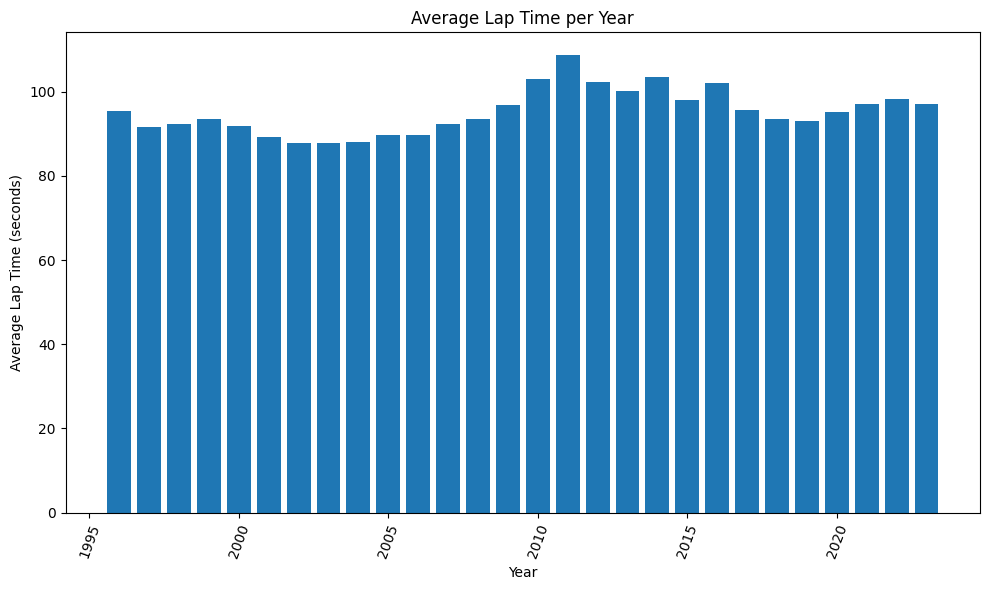

In [97]:
lapTimes_races = lapTimes.merge(races[['raceId', 'year']], on='raceId', how='inner')

average_lap_time_per_year = lapTimes_races.groupby('year')['milliseconds'].mean().reset_index(name='mean')
average_lap_time_per_year['mean'] = average_lap_time_per_year['mean'] / 1000
#print(average_lap_time_per_year)

plt.figure(figsize=(10, 6))
plt.bar(average_lap_time_per_year['year'],average_lap_time_per_year['mean'])
plt.xlabel('Year')
plt.ylabel('Average Lap Time (seconds)')
plt.title('Average Lap Time per Year')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Information

In [98]:
print(drivers.count())
print(circuits.count())
print(seasons.count())

# drivers: 858
# races: 1001
# circuits: 77
# seasons: 74
# constructors: 211

driverId       858
driverRef      858
number         858
code           858
forename       858
surname        858
dateOfBirth    858
nationality    858
url            858
dtype: int64
circuitId     77
circuitRef    77
name          77
location      77
country       77
lat           77
lng           77
alt           77
url           77
dtype: int64
year    74
url     74
dtype: int64
